# Trying to reproduce Figure 1

In [1]:
from biom import load_table
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Figure 1E

/Users/antoniog/.virtualenvs/qiita-analysis/lib/python3.5/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.513720652865238 and the largest is 63.563217229864286.
  RuntimeWarning


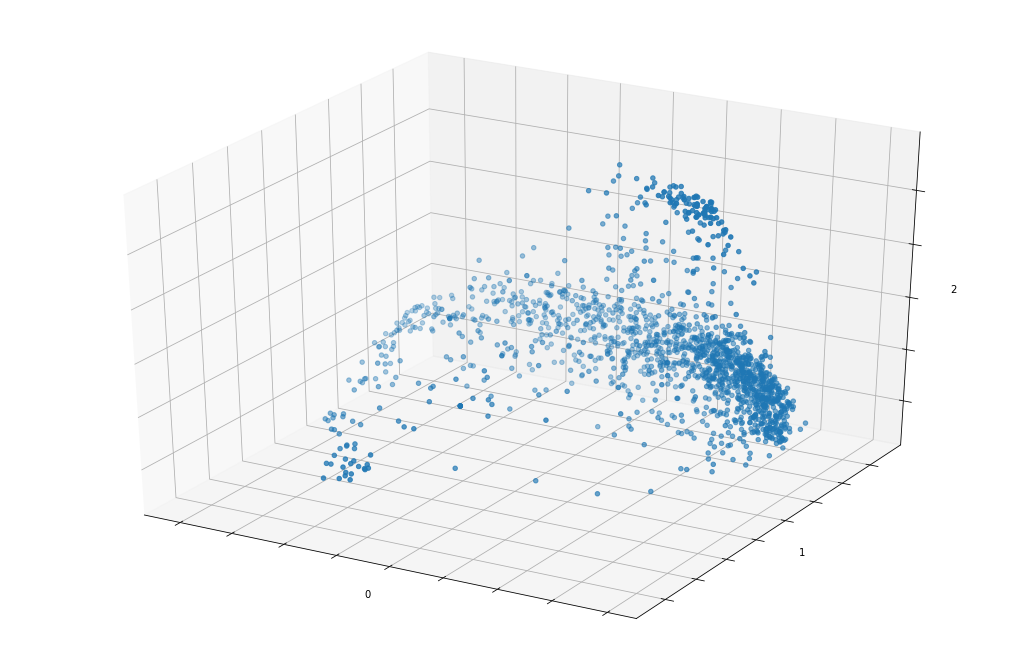

In [2]:
# Downloading WGS data
!curl -s -o taxonomic_profiles.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/WGS/1750/taxonomic_profiles.tsv.gz
!biom convert -i taxonomic_profiles.tsv.gz -o taxonomic_profiles.biom \
    --table-type="OTU table" --to-hdf5

# loading data
bf = load_table('taxonomic_profiles.biom')
ids = bf.ids()
data = [bf.data(_id, axis='sample') for _id in ids]

# distance and pcoa
bc_dm = beta_diversity("braycurtis", data, ids, validate=False)
bc_pc = pcoa(bc_dm)

# plotting
f = bc_pc.plot()
f.set_size_inches(15, 10)

In [3]:
bc_pc.eigvals[:2]

PC1    63.563217
PC2    22.789397
dtype: float64

##  Data for Transcriptomics 
### (empty files) 

In [4]:
# Downloading MTX data
!curl -s -o genefamilies.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/MTX/1730/genefamilies.tsv.gz
!ls -lah genefamilies.tsv.gz

-rw-r--r--  1 antoniog  staff     0B Jan 10 17:26 genefamilies.tsv.gz


In [5]:
# Let's try another one
!curl -s -o ecs.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/MTX/1730/ecs.tsv.gz
!ls -lah ecs.tsv.gz

-rw-r--r--  1 antoniog  staff     0B Jan 10 17:26 ecs.tsv.gz


## Data for 16 biopsies 

/Users/antoniog/.virtualenvs/qiita-analysis/lib/python3.5/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.25562743740285415 and the largest is 9.9758367319952.
  RuntimeWarning


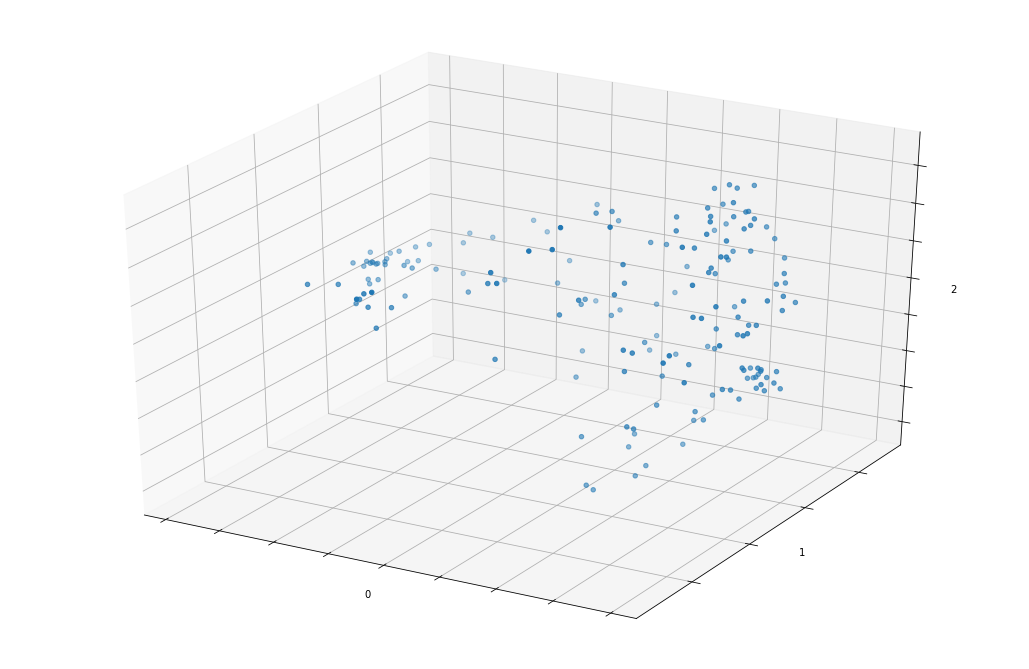

In [6]:
# Downloading 16S data
!curl -s -o taxonomic_profiles.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/16S/1802/taxonomic_profiles.tsv.gz
!biom convert -i taxonomic_profiles.tsv.gz -o taxonomic_profiles.biom \
    --table-type="OTU table" --to-hdf5

# loading data
bf = load_table('taxonomic_profiles.biom')
ids = bf.ids()
data = [bf.data(_id, axis='sample') for _id in ids]

# distance and pcoa
bc_dm = beta_diversity("braycurtis", data, ids, validate=False)
bc_pc = pcoa(bc_dm)

# plotting
f = bc_pc.plot()
f.set_size_inches(15, 10)

In [7]:
bc_pc.eigvals[:2]

PC1    9.975837
PC2    4.670452
dtype: float64

## Metabolites

/Users/antoniog/.virtualenvs/qiita-analysis/lib/python3.5/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.22478671364776412 and the largest is 20.609730414508178.
  RuntimeWarning


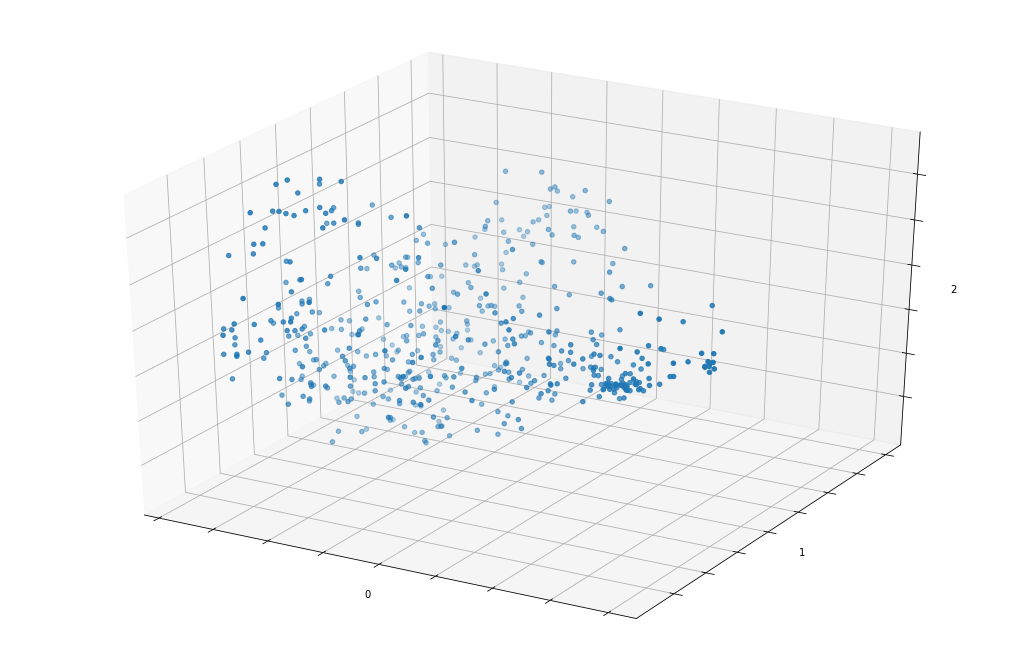

In [8]:
# Downloading 16S data
!curl -s -o iHMP_metabolomics.csv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/Metabolites/1723/iHMP_metabolomics.csv.gz

df = pd.read_csv('iHMP_metabolomics.csv.gz', compression='gzip', dtype=str)
df.drop(['Method', 'Pooled QC sample CV', 'm/z', 'RT', 
         'HMDB (*Representative ID)', 'Metabolite'], axis=1, inplace=True)
df.set_index('Compound', inplace=True)
df.fillna(0, inplace=True)
df.to_csv('iHMP_metabolomics.csv', sep='\t')

!biom convert -i iHMP_metabolomics.csv -o iHMP_metabolomics.biom \
     --table-type="Metabolite table" --to-hdf5

# loading data
bf = load_table('iHMP_metabolomics.biom')
ids = bf.ids()
data = [bf.data(_id, axis='sample') for _id in ids]

# distance and pcoa
bc_dm = beta_diversity("braycurtis", data, ids, validate=False)
bc_pc = pcoa(bc_dm)

# plotting
f = bc_pc.plot()
f.set_size_inches(15, 10)

In [9]:
bc_pc.eigvals[:2]

PC1    20.609730
PC2    12.133377
dtype: float64